In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

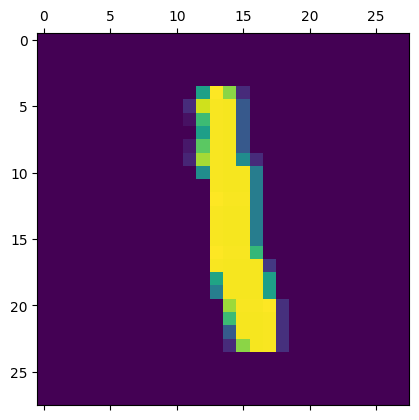

In [7]:
plt.matshow(X_train[6])

In [8]:
y_train[6]

1

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
X_train.shape

(60000, 28, 28)

In [16]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4710 - accuracy: 0.8761
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3033 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2832 - accuracy: 0.9218
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2734 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2669 - accuracy: 0.9263


In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 899us/step - loss: 0.2697 - accuracy: 0.9258


[0.26969218254089355, 0.9258000254631042]

In [19]:
y_predicted = model.predict(X_test)
y_predicted[0]

313/313 [==============================] - 0s 746us/step


array([2.1034056e-02, 4.4535466e-07, 5.4350600e-02, 9.5589691e-01,
       3.1113224e-03, 8.7530397e-02, 1.0896600e-06, 9.9975115e-01,
       7.6681405e-02, 6.2320429e-01], dtype=float32)

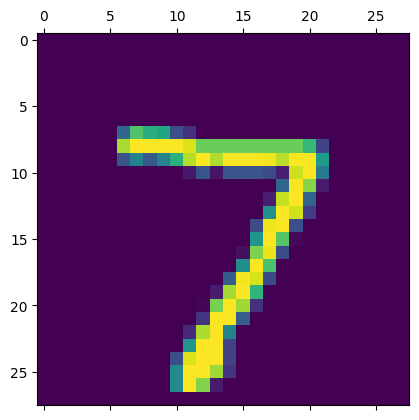

In [20]:
plt.matshow(X_test[0])

In [21]:
np.argmax(y_predicted[0])

7

looping over the numpy argmax function to get the predictions

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [23]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

checking the confusion matrix

In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    1,    1,    0,    4,    7,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   5,    7,  949,   12,   10,    3,   12,   10,   20,    4],
       [   4,    0,   20,  927,    0,   24,    2,   13,   11,    9],
       [   1,    1,    4,    1,  925,    0,   10,    4,    8,   28],
       [  13,    3,    3,   29,   10,  774,   20,    7,   27,    6],
       [  13,    3,    6,    1,    7,   10,  915,    2,    1,    0],
       [   1,    5,   23,    6,    8,    0,    0,  950,    2,   33],
       [  10,    7,   11,   31,   10,   33,   12,   14,  837,    9],
       [  11,    7,    1,   12,   35,    8,    0,   26,    3,  906]],
      dtype=int32)>

plotting the confusion matrix using heatmap

Text(95.72222222222221, 0.5, 'Truth')

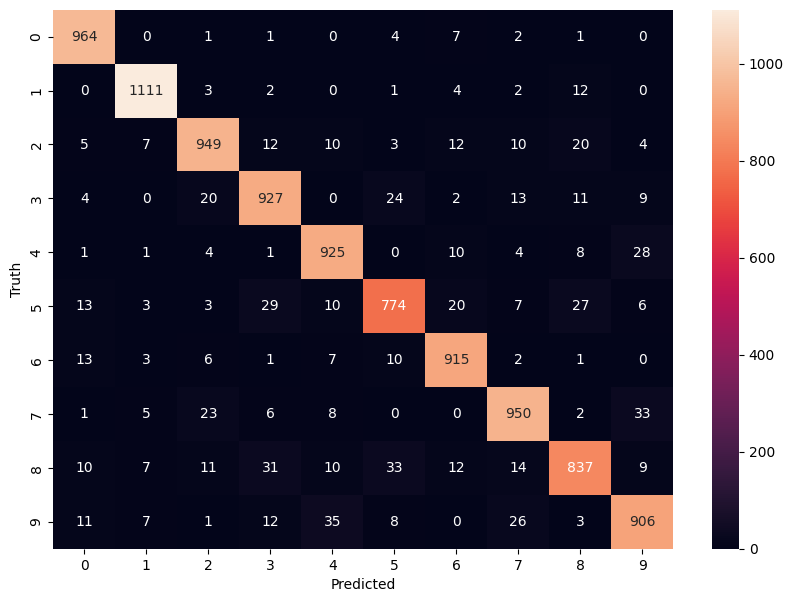

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Hidden Layer

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2753 - accuracy: 0.9218
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1220 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0851 - accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0653 - accuracy: 0.9809
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0515 - accuracy: 0.9845
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0413 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0337 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0278 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0223 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [28]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0778 - accuracy: 0.9783


[0.07775517553091049, 0.9782999753952026]

313/313 [==============================] - 1s 3ms/step


Text(95.72222222222221, 0.5, 'Truth')

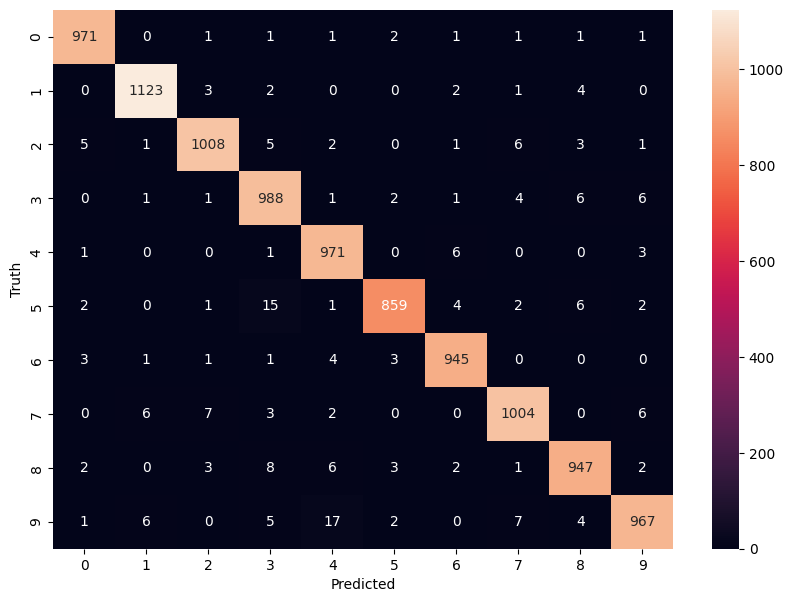

In [30]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')